# 🔍**Finsight:** *análise para identificação de fraudes em transações digitais*

Dashboard: https://public.tableau.com/views/Finsight/Dashboard

No mercado de transações online, tem sido cada vez mais frequente encontrarmos tentativas de manipulação às plataformas de compras com o intuito de se cometer fraudes e obter vantagens financeiras sobre os lojistas e sobre outros clientes.

A identificação de possíveis transações fraudulentas pode ser realizada por meio da análise dos dados gerados pelas operações efetuadas na plataforma. Essa abordagem permite examinar padrões de comportamento recorrentes em transações previamente classificadas como fraudulentas, contribuindo para a prevenção e a mitigação de novas práticas ilicítas no sistema.

Esse estudo visa analisar detalhadamente o comportamento do usuário durante a navegação e utilização da plataforma, considerando aspectos como os métodos de segurança empregados no momento da compra, valores médios gastos e o tempo decorrido desde a criação da conta. O objetivo é avaliar se determinados comportamentos podem representar potencial risco de fraude, aprimorando assim os mecanismos de detecção e resposta a tentativas de golpe.

## 1. Importando os dados

In [1]:
# Importa as bibliotecas para análise dos dados.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# Importa o conjunto de dados e define o id da transação como índice.
df = pd.read_csv('../datasets/transactions.csv', index_col='transaction_id')

In [3]:
# Exibe os 5 primeiros registros.
df.head()

,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
transaction_id,,,,,,,,,,,,,,,,
1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [4]:
# Consulta as informações sobre o conjunto de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299695 entries, 1 to 299695
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  299695 non-null  int64  
 1   account_age_days         299695 non-null  int64  
 2   total_transactions_user  299695 non-null  int64  
 3   avg_amount_user          299695 non-null  float64
 4   amount                   299695 non-null  float64
 5   country                  299695 non-null  object 
 6   bin_country              299695 non-null  object 
 7   channel                  299695 non-null  object 
 8   merchant_category        299695 non-null  object 
 9   promo_used               299695 non-null  int64  
 10  avs_match                299695 non-null  int64  
 11  cvv_result               299695 non-null  int64  
 12  three_ds_flag            299695 non-null  int64  
 13  transaction_time         299695 non-null  object 
 14  shipping_

In [5]:
# Converte a coluna de horário da transação para o tipo de data.
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

In [6]:
# Consulta os valores únicos de país de origem do cliente.
df['country'].unique()

array(['FR', 'US', 'TR', 'PL', 'ES', 'IT', 'RO', 'GB', 'NL', 'DE'],
      dtype=object)

In [7]:
# Consulta os valores únicos de país do banco.
df['bin_country'].unique()

array(['FR', 'US', 'RO', 'ES', 'TR', 'DE', 'GB', 'IT', 'PL', 'NL'],
      dtype=object)

In [8]:
'''
Os países são os mesmos para ambas as colunas (país de origem do cliente e do banco). 

Vamos criar um dicionário de paleta de cores com base nas cores das bandeiras dos países, definindo um contraste entre elas.
'''
flags_palette = {
    'FR': '#0055a4', 
    'US': '#8b0000', 
    'TR': '#e30a17', 
    'PL': '#ff6f61', 
    'ES': '#f4c300', 
    'IT': '#008c45', 
    'RO': '#7b3fe4', 
    'GB': '#2e1a47', 
    'NL': '#ff7a00', 
    'DE': '#111111'
}

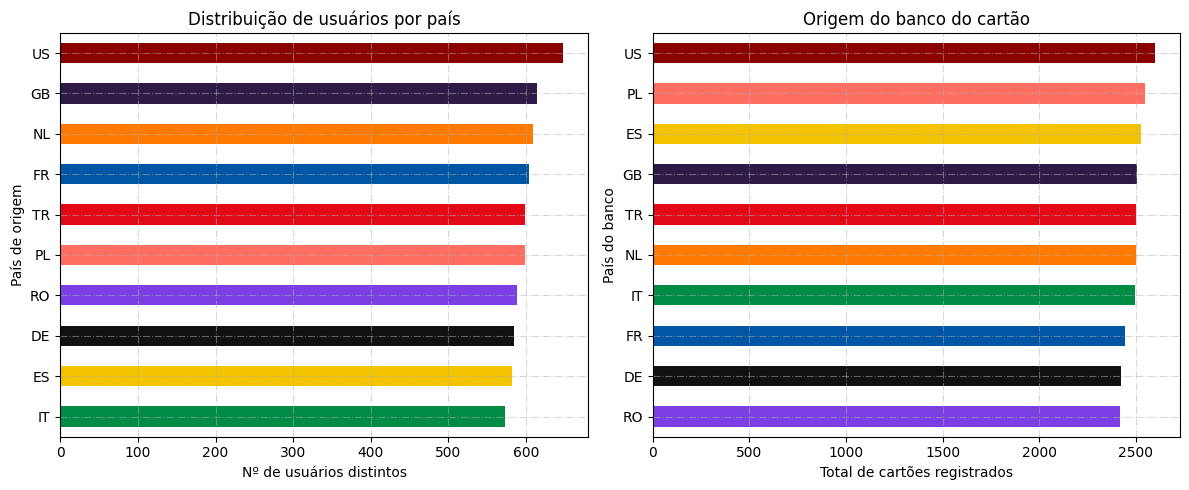

In [9]:
# Define um diagrama para exibir dois gráficos lado a lado.
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Primeiro gráfico: referente ao número de usuários únicos por país.
client_countries = df.groupby('country')['user_id'].nunique().sort_values()

client_countries.plot(kind='barh', ax=axes[0], color=client_countries.index.map(flags_palette))
axes[0].set_title('Distribuição de usuários por país')
axes[0].set_xlabel('Nº de usuários distintos')
axes[0].set_ylabel('País de origem')
axes[0].grid(True, alpha=0.5, linestyle='-.')

# Segundo gráfico: referente ao número de usuários únicos pela origem do banco.
bank_countries = df.groupby('bin_country')['user_id'].nunique().sort_values()

bank_countries.plot(kind='barh', ax=axes[1], color=bank_countries.index.map(flags_palette))
axes[1].set_title('Origem do banco do cartão')
axes[1].set_xlabel('Total de cartões registrados')
axes[1].set_ylabel('País do banco')
axes[1].grid(True, alpha=0.5, linestyle='-.')

plt.tight_layout()
plt.show()

Logo na análise de origem das transações, observamos uma alta quantidade de registros de cartões vinculados a bancos da Polônia e da Espanha. Se comparado com o quadro dos países de origem dos usuários, identificamos que esses países não estão entre aqueles que registram maior número de usuários, apesar de terem números próximos a eles.

Essa diferença entre os números desperta o primeiro alerta quanto às transações do nosso banco de dados. Vamos seguir investigando as transações com cartões de bancos vinculados aos dois países, a fim de identificar possíveis transações fraudulentas vinculadas a eles.

## 2. Identificando correlação entre características das transações

In [10]:
# Cria a matriz de correlação e remove as colunas categóricas.
cm = df.drop(columns=['user_id', 'country', 'bin_country', 'channel', 'merchant_category', 'transaction_time']).corr()

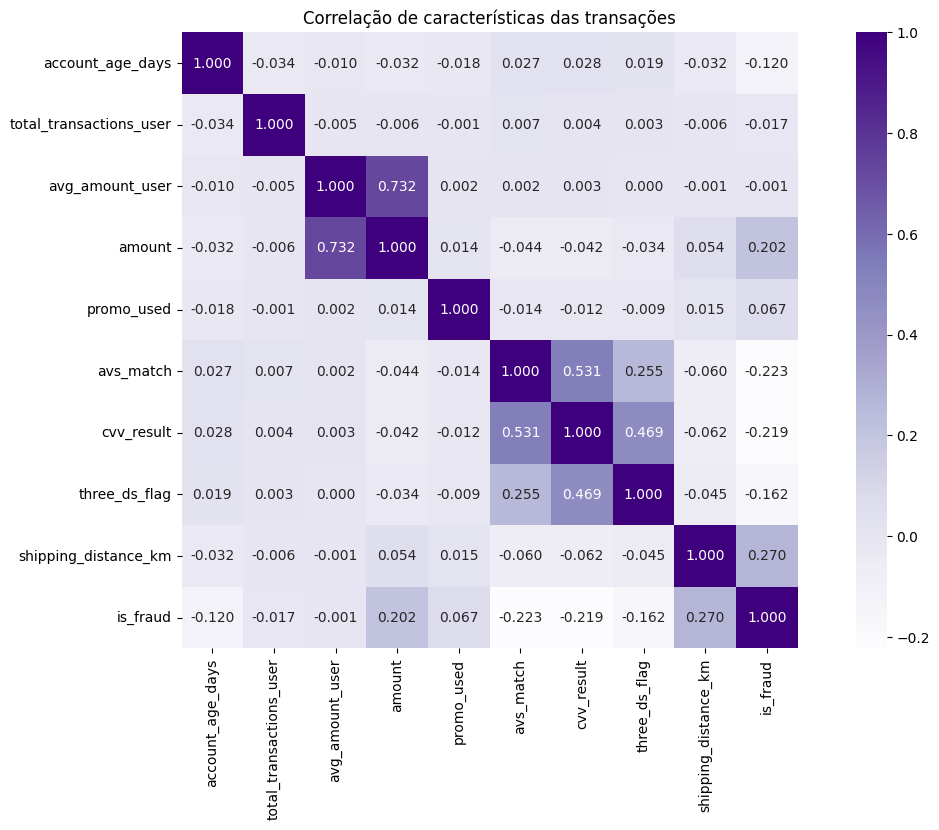

In [11]:
# Exibe a matriz de correlação das características do conjunto de dados.
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='.3f', square=True, cmap='Purples')
plt.title('Correlação de características das transações')
plt.show()

Podemos observar que a principal correlação se destaca entre as características padrões para captação de compras fraudulentas. São elas: checagem do endereço de entrega com o da cobrança, código de verificação do cartão e fator de autenticação forte. Se uma dessas caracteristicas não se faz presente no ato da compra, é bem provável que as demais também não estejam presentes, o que acende o alerta para o risco na transação.

Ademais, podemos observar que, na análise de transações fraudulentas, características como o valor da compra e a distância para o endereço de entrega do pedido também apresentaram forte correlação, destacando esses dois fatores como possíveis indicadores para outras transações fraudulentas. Sendo assim, as caractrerísticas apresentadas são as mais passíveis de representarem fraudes no sistema:

- Se o endereço da compra bate com o endereço cadastro no banco do cartão (assim como os países de origem);
- Verificação dos 3 dígitos de segurança do cartão;
- Fator de autenticação adicional do banco;
- Valor total da compra; e
- Distância para o endereço de entrega do pedido (distância do frete).

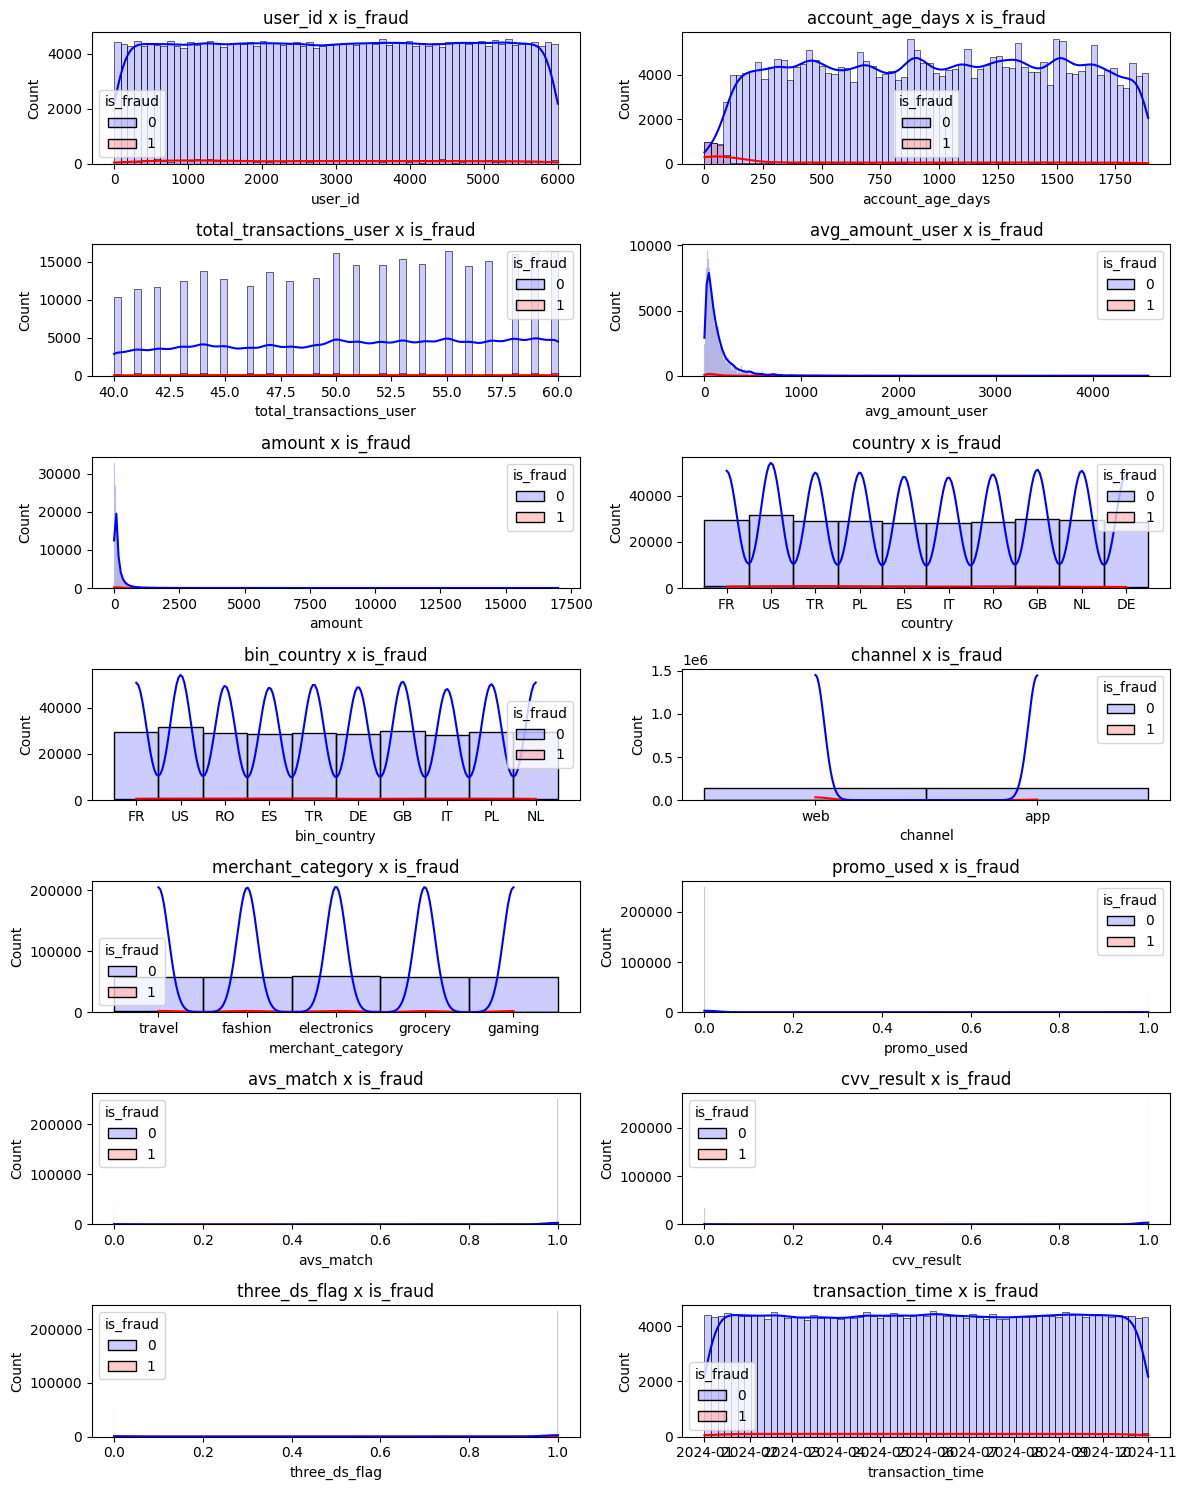

In [12]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,15)) # Formata a exibição dos gráficos em 7x2 (7 linhas por 2 colunas).

# O código acima gera uma matriz de eixos 7x2. Para iterarmos em zip, transformamos a matriz para uma lista (ou vetor).
axes = axes.flatten()

for ax, col in zip(axes, df.columns): # Na iteração, cada eixo recebe uma coluna do dataframe para plotar.
    sns.histplot(data=df, x=col, hue='is_fraud', kde=True, ax=ax, alpha=0.2, palette=['blue','red'])
    ax.set_title(f'{col} x is_fraud')

plt.tight_layout()
plt.show()

Além das características identificadas anteriormente, por meio dos gráficos acima podemos destacar dois possíveis novos fatores para a maior quantidade de fraudes em transações: o primeiro está relacionado à idade da conta do usuário. Contas mais novas são mais propícias na representação de transações fraudulentas. Em seguida, notamos que o número de fraudes foi levemente maior em transações via web que pelo aplicativo do nosso sistema.

- Contas mais novas tendem a representar transações mais fraudulentas;
- Mais fraudes em transações feitas via web que pelo app.

### 2.1 Analisando a taxa de fraudes sobre a origem da transação

In [13]:
# Calcula a taxa de fraudes em operações nas quais a origem do cliente e do banco divergem.
df['is_country_diff'] = df['country'] != df['bin_country']

In [14]:
print('-- Taxa de fraudes quando o país de origem do usuário e do seu banco são diferentes --')
df.loc[df['is_country_diff']==1, 'is_fraud'].mean() * 100

-- Taxa de fraudes quando o país de origem do usuário e do seu banco são diferentes --


np.float64(11.276864728192162)

In [15]:
print('-- Taxa de fraudes quando o país de origem do usuário e do seu banco são os mesmos --')
df.loc[df['is_country_diff']==0, 'is_fraud'].mean() * 100

-- Taxa de fraudes quando o país de origem do usuário e do seu banco são os mesmos --


np.float64(1.4262678238182378)

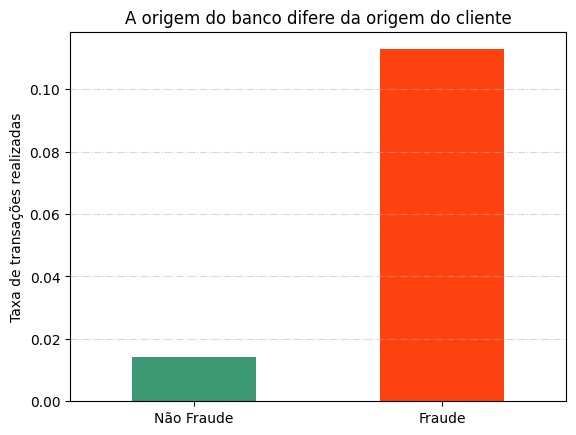

In [16]:
# Apresenta a observação gráfica dessa taxa de fraudes em operações.
df.groupby('is_country_diff')['is_fraud'].mean().plot(kind='bar', color=['#3d9973', '#fe420f'])

plt.title('A origem do banco difere da origem do cliente')
plt.xlabel('')
plt.ylabel('Taxa de transações realizadas')
plt.xticks(ticks=[0, 1], labels=['Não Fraude', 'Fraude'], rotation=0)
plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.show()

Uma das observações feitas foi que, dentre as transações cuja origem do cliente diverge da do banco de seu cartão, 11.3% delas representam fraudes. Ou seja, no contexto em que o banco seja diferente do país do cliente, cerca de 1 em cada 10 transações representa uma transação fraudulenta para o sistema. Por outro lado, quando o país de origem do usuário e o do seu banco são os mesmo, apenas 1.4% das transações foram identificadas como fraudes. Isso representa cerca de 1 em cada 100 transações, um número bem menor que o observado anteriormente.

## 3. Coleta de informações sobre as transações apontadas como fraudes

### 3.1 Possível sazonalidade das fraudes

Para analisar se é possível prever o comportamento de usuários que cometem fraudes, examinaremos quais dias da semana concentram o maior número de transações fraudulentas. Dessa forma, podemos preparar o sistema para responder adequadamente às tentativas de fraude nos períodos com maior incidência de golpes identificados durante o período estudado.

In [17]:
# Filtra um dataframe apenas com as transações apontadas como fraude.
df_fraud = df[df['is_fraud']==1].drop(columns=['is_fraud'])

In [18]:
# Cria uma coluna para identificar o dia da semana de cada transação (0 é domingo, 7 é segunda)
df_fraud['weekday'] = (df_fraud['transaction_time'].dt.dayofweek + 1) % 7

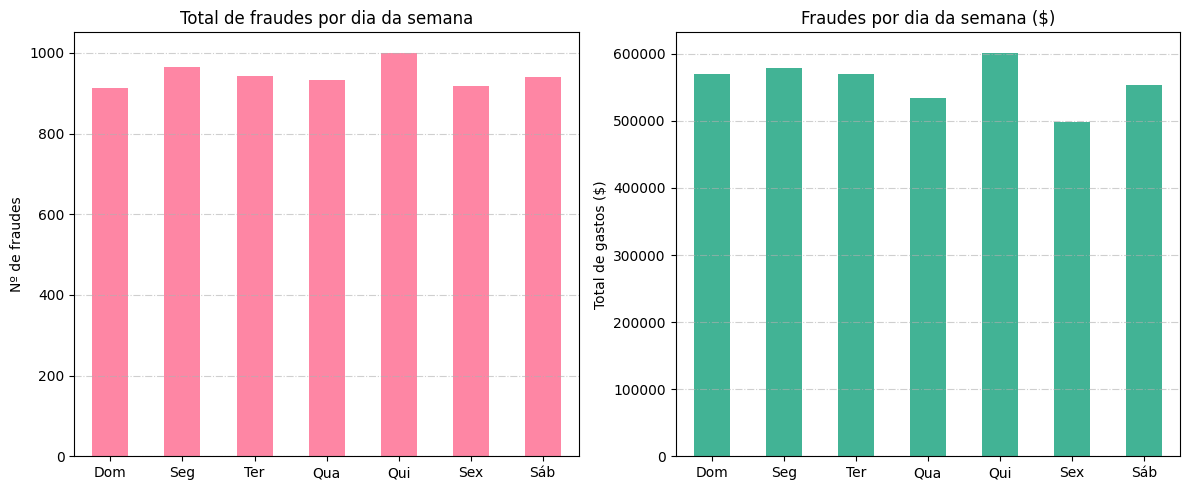

In [19]:
# Define o diagrama para exibir os gráficos lado a lado (1 linha e 2 colunas).
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Agrupa a contagem de fraudes por dia da semana.
weekd_frauds_count = df_fraud.groupby('weekday')['user_id'].count()

# Separa os números de cada dia da semana em uma variável, para trabalhar o rótulo dos dias.
days_of_week = weekd_frauds_count.index

# Primeiro gráfico: número de fraudes por cada dia da semana.
weekd_frauds_count.plot(kind='bar', ax=axes[0], color='#fe86a4')
axes[0].set_title('Total de fraudes por dia da semana')
axes[0].set_xlabel('')
axes[0].set_ylabel('Nº de fraudes')
axes[0].set_xticks(ticks=days_of_week, labels=['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'], rotation=0)
axes[0].grid(True, axis='y', linestyle='-.', alpha=0.6)

# Realiza o somatório do valor gasto por dia da semana.
weekd_frauds_amount = df_fraud.groupby('weekday')['amount'].sum()

# Segundo gráfico: valor gasto em fraudes por dia da semana.
weekd_frauds_amount.plot(kind='bar', ax=axes[1], color='#42b395')
axes[1].set_title('Fraudes por dia da semana ($)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Total de gastos ($)')
axes[1].set_xticks(ticks=days_of_week, labels=['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'], rotation=0)
axes[1].grid(True, axis='y', linestyle='-.', alpha=0.6)

plt.tight_layout()
plt.show()

Observamos, em números, que a concentração de fraudes por dias da semana se mantém próxima durante todos os dias, tanto em quantitativo de fraudes, quanto em valores gastos nas transações fraudulentas. Apesar disso, notamos um **pico** em ambos os gráficos **na quinta-feira**, representando assim o dia mais passível para tentativas de fraudes em nosso sistema de vendas digitais. Já o dia seguinte, sexta-feira, apresentou o menor número em relação ao montante de compras fraudulentas.

In [20]:
# Calcula a taxa de fraudes (%) por dia da semana.
n_frauds = (df.set_index('transaction_time').resample('W')['is_fraud'].sum() / 
            df.set_index('transaction_time').resample('W')['is_fraud'].count()) * 100

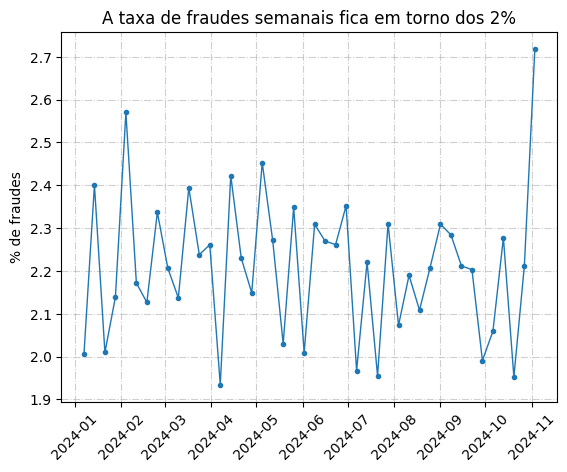

In [21]:
# Exibe um gráfico de linha com a distribuição semanal das taxas de fraude.
plt.plot(n_frauds.index, n_frauds.values, marker='.', linewidth=1)
plt.title('A taxa de fraudes semanais fica em torno dos 2%')
plt.xlabel('')
plt.ylabel('% de fraudes')

plt.xticks(rotation=45)
plt.grid(True, linestyle='-.', alpha=0.6)
plt.show()

Em uma comparação semanal, verificamos que existem diversos picos e declives na porcentagem de fraudes durante o período em estudo, mantendo-se em torno de 2% de fraudes observadas por semana. Dessa forma, não é possível identificar um período de sazonalidade das fraudes, apesar de ser notável que o maior pico de fraudes ocorreu na primeira semana de fevereiro de 2024.

### 3.2 Origem das transações fraudulentas

In [22]:
df_fraud.groupby('country')['user_id'].count().sort_values(ascending=False).head()

country
TR    843
US    748
RO    709
PL    701
ES    668
Name: user_id, dtype: int64

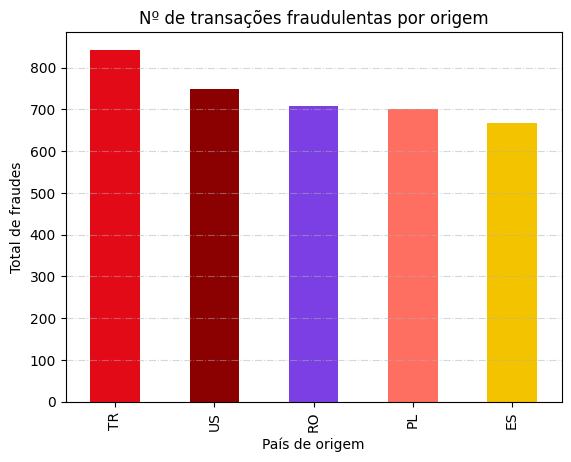

In [23]:
# Contagem sobre os países com mais transações classificadas como fraude.
top_5_countries = df_fraud.groupby('country')['user_id'].count().sort_values(ascending=False).head()

# Exibe o gráfico dos 5 países com mais fraudes por cliente.
top_5_countries.plot(kind='bar', color=top_5_countries.index.map(flags_palette))

plt.title('Nº de transações fraudulentas por origem')
plt.xlabel('País de origem')
plt.ylabel('Total de fraudes')
plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.show()

Como podemos observar, o país com a maior concentração de usuários envolvidos em fraudes durante suas compras foi a Turquia, com mais de 850 transações fraudulentas, seguida pelos Estados Unidos, com cerca de 750 fraudes e Romênia, com marca próxima às 700 fraudes, assim como a Polônia. Portanto, esses países são os mais passíveis de alertas para potenciais fraudes, principalmente em transações originárias da Turquia.

### 3.3 Investigando a distância para o destino de entrega

In [24]:
# Filtra outro dataframe com as transações seguras.
df_not_fraud = df[~df.index.isin(df_fraud.index)].drop(columns=['is_fraud']) # ou df[df['is_fraud']==0].drop(columns=['is_fraud'])

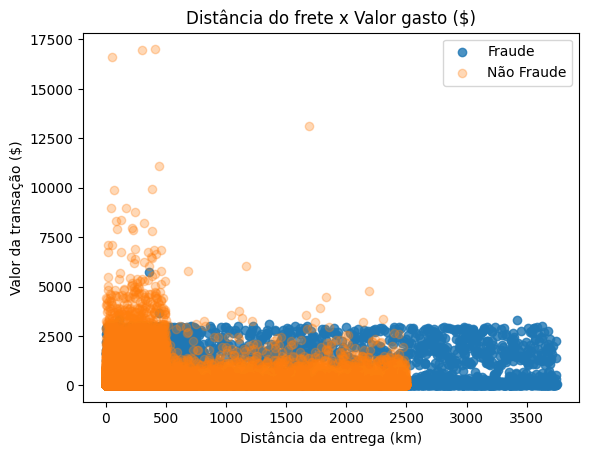

In [25]:
# Gráfico de dispersão entre a distância do frete e o valor da compra.
plt.scatter(df_fraud['shipping_distance_km'], df_fraud['amount'], alpha=0.8) # para fraudes.
plt.scatter(df_not_fraud['shipping_distance_km'], df_not_fraud['amount'], alpha=0.3) # para não fraudes.

plt.xlabel('Distância da entrega (km)')
plt.ylabel('Valor da transação ($)')
plt.title('Distância do frete x Valor gasto ($)')
plt.legend(labels=['Fraude','Não Fraude'])
plt.show()

O gráfico de dispersão apresentado ilustra a distribuição das fraudes em compras cujo destino de entrega ultrapassa o observado em transações consideradas seguras. Nota-se que, embora as transações seguras apresentem maiores valores de compra ($) em menores distâncias, o destino de entrega pode alcançar até 2.500 km. Em contrapartida, as compras fraudulentas concentram seus valores na faixa de até 2.500 dólares, porém o destino do frete dessas operações pode chegar a 3.500 km de distância em relação à origem de entrega do produto.

In [26]:
# Criação de pivot table para comparar três características do conjunto de dados (distância do frete x categoria x país do cliente) em não fraudes.
non_fraud_dist_by_cat = df_not_fraud.pivot_table(values='shipping_distance_km', index='merchant_category', columns='country', aggfunc='mean')

In [27]:
# Criação de pivot table para comparar três características do conjunto de dados (distância do frete x categoria x país do cliente) em fraudes.
fraud_dist_by_cat = df_fraud.pivot_table(values='shipping_distance_km', index='merchant_category', columns='country', aggfunc='mean')

In [28]:
# Cálculo da taxa de aumento da distância para transações apontadas como fraudes.
fraud_dist_by_cat / non_fraud_dist_by_cat

country,DE,ES,FR,GB,IT,NL,PL,RO,TR,US
merchant_category,,,,,,,,,,
electronics,3.464862,3.312637,3.486721,3.160985,2.865581,3.340818,3.286841,3.128958,3.555529,3.375875
fashion,3.050211,3.493735,3.327186,3.293648,3.585252,3.730686,3.511407,3.466521,3.229187,3.077755
gaming,3.150508,3.154222,2.891725,3.455322,3.423024,3.142197,3.413330,3.256697,3.199332,3.579150
grocery,3.275608,3.451602,3.355569,3.345291,3.395253,4.213862,3.077610,3.653516,3.053667,3.372572
travel,3.564021,2.974996,3.556443,3.360324,3.060252,3.396715,2.891655,3.318368,3.348538,2.909669


Como podemos visualizar no quadro acima em números, transações identificadas como fraudes apresentam distância do frete muito superior àquelas não apontadas como fraudulentas (cerca de 3 vezes maiores). Isso se caracteriza por usuários que se utilizam de contas falsas para solicitar compras para diversas localidades do globo, na tentativa de enganar o comportamento padrão dos usuários da plataforma.

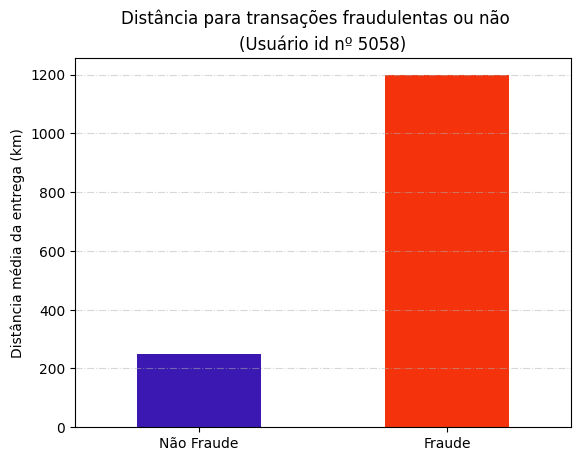

In [29]:
# Observação individual do comportamento de distância do frete para o usuário nº 5058.
df[df['user_id']==5058].groupby('is_fraud')['shipping_distance_km'].mean().plot(kind='bar', color=['#3a18b1', '#f4320c'])

plt.suptitle('Distância para transações fraudulentas ou não')
plt.title('(Usuário id nº 5058)')

plt.xlabel('')
plt.ylabel('Distância média da entrega (km)')
plt.xticks(ticks=[0, 1], labels=['Não Fraude', 'Fraude'], rotation=0)
plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.show()

Em relação ao comportamento individual de um usuário da plataforma, notamos a grande dispersão na distância entre as transações fraudulentas e as apontadas como seguras. Enquanto essas últimas não tiveram distância superior aos 300 km, as apontadas como fraudes tiveram distância média 1.200 km para o frete, valor quatro vezes maior do que o real destino do cliente em estudo.

In [30]:
# Índice dos usuários com maior percentual de fraudes.
top_10_users_by_fraud = df.groupby('user_id')['is_fraud'].mean().sort_values(ascending=False).head(8).index

In [31]:
# Captura suas informações no dataframe original.
df_top_10 = df[df['user_id'].isin(top_10_users_by_fraud)]

In [32]:
# Obtém o número de fraudes de cada um desses usuários.
df_top_10.groupby('user_id')['is_fraud'].sum()

user_id
946     29
1093    33
1215    34
2303    29
3542    27
3751    24
4444    26
5084    24
Name: is_fraud, dtype: int64

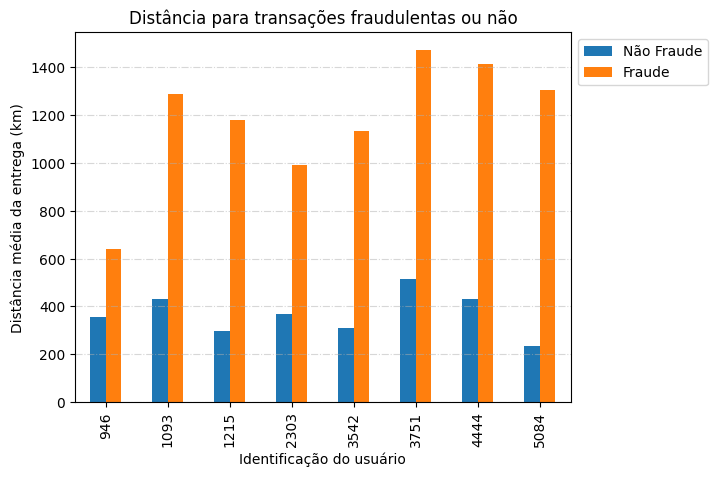

In [33]:
# Gráfico empilhado mostrando a diferença entre a distância do frete para fraudes e não fraudes.
df_top_10.groupby(['user_id', 'is_fraud'])['shipping_distance_km'].mean().unstack().plot(kind='bar')

plt.title('Distância para transações fraudulentas ou não')
plt.xlabel('Identificação do usuário')
plt.ylabel('Distância média da entrega (km)')
plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.legend(labels=['Não Fraude', 'Fraude'], bbox_to_anchor=(1.29, 1))
plt.show()

Novamente observamos como divergem os números da distância do frete para transações apontadas como fraude e aquelas classificadas como transações seguras. Alguns valores de distância chegam a ser **quase sete vezes maiores** durante as aplicações de golpe. Definitivamente podemos classificar esse como um dos principais fatores para a identificação de fraudes e golpes à plataforma: o aumento da distância de entrega para os valores padrões de cada cliente.

### 3.4 Parâmetros de segurança da compra

In [34]:
# Funil de observação para os fatores de segurança da compra (0: não apresenta o fator. 1: apresenta o fator de segurança).
(df.groupby(['avs_match', 'cvv_result', 'three_ds_flag'])['is_fraud'].mean()*100).round(2)

avs_match  cvv_result  three_ds_flag
0          0           0                18.08
                       1                 5.26
           1           0                 8.14
                       1                 3.41
1          0           0                 3.07
                       1                 0.89
           1           0                 1.27
                       1                 0.58
Name: is_fraud, dtype: float64

Observa-se que, quando os três fatores de segurança da compra estão presentes, apenas 0,58% dessas transações representaram uma compra apontada como fraudulenta. Por outro lado, quando nenhum dos fatores de segurança se fez presente, mais de 18% das compras foram apontadas como fraudes.

Analisando esses parâmetros de segurança das compras, o que apresentou menor taxa de fraudes foi o de verificação do endereço de cobrança (AVS). Cerca de 3% das compras que tiveram apenas essa forma de verificação presente foram apontadas como fraudulentas. Em torno de 5% das compras que possuíam apenas a autenticação pelo banco do cliente (3DS) apresentaram-se como possíveis fraudes.

Já em relação à **verificação do código de segurança do cartão (CVV)** do cliente, esse se mostrou como o parâmetro de segurança mais vulnerável para compras fraudulentas. Mais de 8% das compras que indicaram apenas esse fator de segurança presente foram indicadas como possíveis fraudes. Portanto, é notável concluir que essa é a forma de segurança menos eficaz dentre as três presentes em nossa análise.

### 3.5 Observando o comportamento dos compradores

In [35]:
# Captura o índice dos maiores compradores (por valor gasto) em transações fraudulentas.
top_buyers_idx = df_fraud.groupby('user_id')['amount'].sum().sort_values(ascending=False).head().index

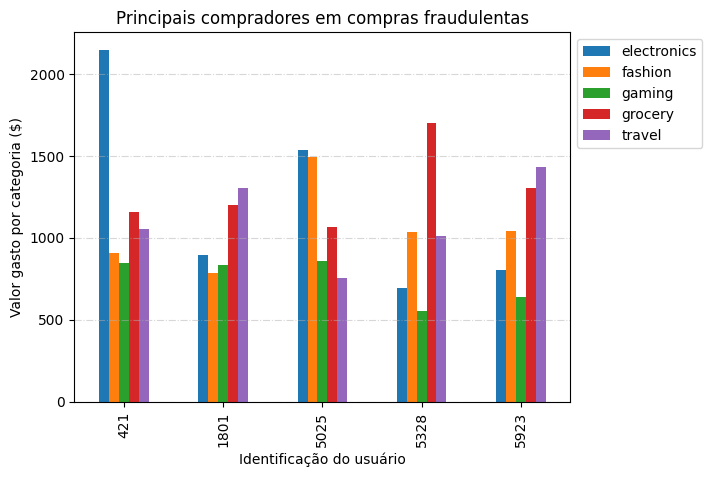

In [36]:
# Desenha o gráfico do valor gasto em fraudes por categoria para os principais compradores.
df_fraud[(df_fraud['user_id'].isin(top_buyers_idx))].groupby(['user_id', 'merchant_category'])['amount'].mean().unstack().plot(kind='bar')

plt.title('Principais compradores em compras fraudulentas')
plt.xlabel('Identificação do usuário')
plt.ylabel('Valor gasto por categoria ($)')
plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.legend(bbox_to_anchor=(1.28,1))
plt.show()

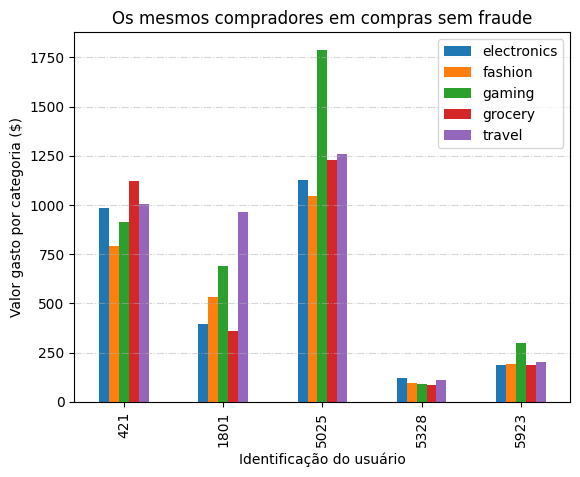

In [37]:
# Desenha o gráfico do valor gasto por categoria em transações seguras para os mesmos compradores.
df_not_fraud[(df_not_fraud['user_id'].isin(top_buyers_idx))].groupby(['user_id', 'merchant_category'])['amount'].mean().unstack().plot(kind='bar')

plt.title('Os mesmos compradores em compras sem fraude')
plt.xlabel('Identificação do usuário')
plt.ylabel('Valor gasto por categoria ($)')
plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Notamos como o comportamento dos usuários muda em compras sem fraude e em compras fraudulentas. Observemos por exemplo os dois últimos usuários do nosso gráfico, os de *id* número 5328 e 5923. Ambos realizaram baixíssimo investimento nas compras sem fraude. Porém, nas compras fraudulentas, seus gastos superaram a marca média de 1.000 dólares em compras nas categorias de moda, mercearia e viagens.

Em outra observação, o primeiro usuário do gráfico tem preferência por eletrônicos ao realizar a aplicação de seus golpes. Já o terceiro usuário, em compras sem fraude, tem preferência por produtos relacionados a jogos. Comportamentos divergentes do usuário durante o uso da plataforma são determinantes para ativar os alarmes de fraudes ao nosso sistema.

Portanto, destacamos ser importante a observação sobre o comportamento do usuário em novas transações, a fim de identificar potenciais novas fraudes ao sistema. No caso em questão, alguns usuários que apresentavam gastos de até 250 dólares, em média, por categoria em compras seguras, pularam para a margem média de 1.000 dólares por categoria nas suas compras fraudulentas.

## 4. Aplicação de hipóteses sobre o conjunto de dados

In [38]:
# Atribui o valor de 5% para o nível de significância dos próximos testes.
alpha = .05 

In [39]:
# Função para aplicação do tipo de teste a ser definido pelo usuário.
def stats_apply_test(a, b, test):

    if test == 'mannwhitneyu': # Aplica o teste U de Mann-Whitney para ambas amostras.
        results = stats.mannwhitneyu(a, b)
        print('### Mann-Whitney U ###')
    
        # Imprime o valor-p do teste.
        print('p-value:', results.pvalue)
    
        # Compara o valor-p com o nível de significância para avaliar a hipótese.
        if (results.pvalue < alpha):
            print("Rejeitamos H₀: há diferença significativa entre as distribuições")
        else:
            print("Não rejeitamos H₀: não há diferença significativa")

    elif test == 'ttest_ind': # Aplica o teste-t de Welch (para variâncias diferentes).
        results = stats.ttest_ind(a, b, equal_var=False)
        print("### t-test de Welch ###")
    
        # Imprime o valor-p do teste.
        print('p-value:', results.pvalue)
    
        # Compara o valor-p com o nível de significância para avaliar a hipótese.
        if (results.pvalue < alpha):
            print('Rejeitamos H₀: há diferença significativa entre as médias')
        else:
            print('Não rejeitamos H₀: não há diferença significativa')

### → Hipótese 1: "O tempo de uso da conta não é determinante para identificar se uma transação é fraude ou não"

In [40]:
# Separa as amostras de transações fraudulentas e não fraudulentas.
fraud = df.loc[df['is_fraud']==1, 'account_age_days'].dropna()
nonfraud = df.loc[df['is_fraud']==0, 'account_age_days'].dropna()

In [41]:
stats_apply_test(fraud, nonfraud, 'mannwhitneyu')

### Mann-Whitney U ###
p-value: 0.0
Rejeitamos H₀: há diferença significativa entre as distribuições


In [42]:
stats_apply_test(fraud, nonfraud, 'ttest_ind')

### t-test de Welch ###
p-value: 0.0
Rejeitamos H₀: há diferença significativa entre as médias


Na aplicação dos testes de hipóteses para investigação de possíveis diferenças entre as distribuições e suas médias, ambos os testes identificaram haver diferença significativa nos grupos de amostras. Em outras palavras, podemos associar o tempo (a idade) da conta como um dos fatores determinantes para identificar transações sinalizadas como fraudes.

Vamos analisar de forma gráfica a distribuição de idade das contas em transações sinalizadas como fraudes e não fraudes.

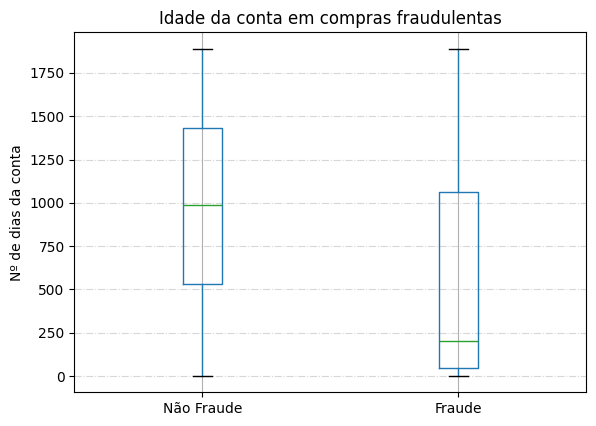

In [43]:
df.boxplot(column='account_age_days', by='is_fraud')

plt.title('Idade da conta em compras fraudulentas')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Nº de dias da conta')

plt.xticks(ticks=[1,2], labels=['Não Fraude', 'Fraude'])

plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.show()

In [44]:
df.groupby('is_fraud')['account_age_days'].median()

is_fraud
0    987.0
1    205.0
Name: account_age_days, dtype: float64

Observamos que, em transações marcadas como fraudulentas, o tempo de conta do usuário é bem inferior àquelas contas cujas compras não foram apontadas como fraudes. Em números, a mediana (o valor central) de idade das contas em compras apontadas como fraudes foi de 205 dias, contra 987 dias daquelas compras identificadas como legítimas. Portanto, esse é mais um padrão identificado em possíveis compras fraudulentas: geralmente, compras com menos de um ano desde sua criação.

### → Hipótese 2: "A utilização de cupom promocional não altera o potencial de uma fraude acontecer"

In [45]:
# Novamente separa as amostras de transações fraudulentas e não fraudulentas.
fraud = df.loc[df['is_fraud']==1, 'promo_used'].dropna()
nonfraud = df.loc[df['is_fraud']==0, 'promo_used'].dropna()

In [46]:
stats_apply_test(fraud, nonfraud, 'mannwhitneyu')

### Mann-Whitney U ###
p-value: 1.3652320913720376e-297
Rejeitamos H₀: há diferença significativa entre as distribuições


In [47]:
stats_apply_test(fraud, nonfraud, 'ttest_ind')

### t-test de Welch ###
p-value: 1.515285261509319e-171
Rejeitamos H₀: há diferença significativa entre as médias


Outra característica curiosa sobre o conjunto de dados pode ser observada com a aplicação dos testes sobre a utilização de cupons de descontos durante as compras. Observamos que houve diferença signifcativa entre as compras apontadas como fraude quanto à aplicação de cupons no ato de compra.

Mais uma vez vamos observar, em gráfico, e avaliar qual tipo de informação podemos obter no contexto dessa correlação.

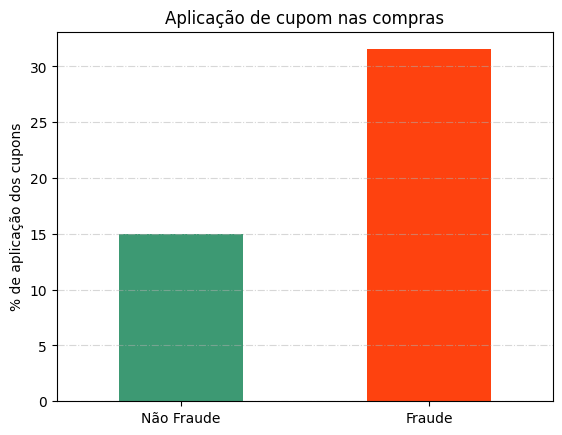

In [48]:
(df.groupby('is_fraud')['promo_used'].mean() * 100).plot(kind='bar', color=['#3d9973', '#fe420f'])

plt.title('Aplicação de cupom nas compras')
plt.xlabel('')
plt.ylabel('% de aplicação dos cupons')
plt.xticks(ticks=[0, 1], labels=['Não Fraude', 'Fraude'], rotation=0)
plt.grid(True, axis='y', linestyle='-.', alpha=0.5)
plt.show()

Vemos que 15% das transações apontadas como seguras tiveram aplicação de cupom de desconto durante o ato de compra. Por outro lado, mais de 30% das transações apontadas como fraude tiveram o desconto aplicado durante a finalização do pedido. Como identificado anteriormente no teste da hipótese, os grupos de fraude e não fraude apresentaram diferença significativa sobre a aplicação do desconto, indicando ser esse mais um possível fator de observação para a detecção de futuras fraudes.

Nesse caso, os cupons podem sim estar sendo usados de maneira indevida pelos potenciais golpistas na aplicação de suas fraudes.

### → Hipótese 3: "Finais de semana são dias mais propensos para a aplicação dos golpes"

In [49]:
# Separa as amostras de fraudes em fins de semana e em dias comerciais.
weekend = df_fraud[df_fraud['weekday'].isin([0, 7])]['amount']
nonweekend = df_fraud[~df_fraud['weekday'].isin([0, 7])]['amount']

In [50]:
stats_apply_test(weekend, nonweekend, 'mannwhitneyu')

### Mann-Whitney U ###
p-value: 0.2712687024553808
Não rejeitamos H₀: não há diferença significativa


In [51]:
stats_apply_test(weekend, nonweekend, 'ttest_ind')

### t-test de Welch ###
p-value: 0.20817358437411815
Não rejeitamos H₀: não há diferença significativa


Em relação à hipótese sobre o aumento do valor das fraudes praticadas durante os finais de semana, observa-se que os testes estatísticos não identificaram diferenças significativas nas distribuições das amostras ou em suas médias. Este resultado indica que as ocorrências de fraude estão distribuídas de forma uniforme ao longo dos dias da semana. Ressalta-se ainda que, conforme analisado anteriormente, a quinta-feira demonstrou ser o dia com maior propensão para fraudes, embora os índices observados nos demais dias apresentem valores bastante semelhantes e homogêneos.

## 5. Aplicando métodos de Machine Learning

In [52]:
# Importa as bibliotecas de padronização e treinamento dos dados.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
# Cria dummies para transformar variáveis categóricas em numéricas, de modo a ajustar nosso modelo com mais características.
df_dummies = pd.get_dummies(df.drop(['user_id', 'transaction_time', 'is_country_diff'], axis=1), 
                            columns=['country', 'bin_country', 'channel', 'merchant_category']).astype(int)

In [54]:
# X são as informações de características. Y é a coluna da variável objetivo (is_fraud).
X = df_dummies.drop('is_fraud', axis=1)
y = df_dummies['is_fraud']

In [55]:
# Treinamento dos dados. Random state no valor 0 assegura que teremos sempre o mesmo parâmetro de treinamento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# Padroniza cada característica (coluna) para a mesma escala: 0 de média e 1 de desvio-padrão.
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

In [57]:
# Escalonamento dos dados de validação.
X_test_st = scaler.transform(X_test)

In [58]:
# Importa as bibliotecas de modelos e métricas do teste.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [59]:
# Aplica o modelo de Regressão Logística aos dados escalonados.
model = LogisticRegression()

In [60]:
model.fit(X_train_st, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [61]:
y_pred = model.predict(X_test_st)

In [62]:
# Aplica as métricas ao teste de Regressão Logística.
print('>>', model, '\n')
print(classification_report(y_test, y_pred))

>> LogisticRegression() 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58544
           1       0.86      0.39      0.54      1395

    accuracy                           0.98     59939
   macro avg       0.92      0.69      0.76     59939
weighted avg       0.98      0.98      0.98     59939



In [63]:
# Aplica o modelo de Floresta Aleatória aos dados escalonados.
model = RandomForestClassifier(random_state=0)

In [64]:
model.fit(X_train_st, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [65]:
y_pred = model.predict(X_test_st)

In [66]:
# Aplica as métricas ao teste de Floresta Aleatória.
print('>>', model, '\n')
print(classification_report(y_test, y_pred))

>> RandomForestClassifier(random_state=0) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     58544
           1       0.94      0.71      0.81      1395

    accuracy                           0.99     59939
   macro avg       0.97      0.86      0.90     59939
weighted avg       0.99      0.99      0.99     59939



In [67]:
# Aplica o modelo de classificação XGBoost aos dados escalonados.
model = XGBClassifier(n_estimators=300,
                      max_depth=6,
                      learning_rate=0.05,
                      subsample=0.8,
                      colsample_bytree=0.8,
                      objective='binary:logistic',
                      random_state=0)

In [68]:
model.fit(X_train_st, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [69]:
y_pred = model.predict(X_test_st)

In [70]:
# Aplica as métricas ao teste em XGBoost.
print('>>', model, '\n')
print(classification_report(y_test, y_pred))

>> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     58544
           1       0.93      0.73      0.82      1395

    accuracy                           0.99     59939
   macro avg       0.

In [71]:
# Verifica a importância das variáveis para a construção do modelo preditivo.
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [72]:
# Imprime as 10 características mais importantes para o modelo.
importances.head(10)

avs_match               0.274573
account_age_days        0.131645
cvv_result              0.090077
shipping_distance_km    0.069985
amount                  0.065906
three_ds_flag           0.048101
channel_web             0.037870
channel_app             0.036910
promo_used              0.036011
avg_amount_user         0.029530
dtype: float32

Ao aplicarmos algoritmos de aprendizado de máquina de regressão e classificação, verificamos que o XGBoost apresentou os melhores resultados. Considerando a estrutura dos dados e o fato da variável alvo assumir dois valores possíveis (1 para fraude e 0 caso contrário), era esperado que o algoritmo de classificação se destacasse como o mais eficiente no conjunto de dados.

No que diz respeito à importância das variáveis para a classificação da variável alvo, a característica com maior probabilidade de acerto foi a comparação entre o endereço de cobrança do cartão e o endereço de entrega. Isso era esperado, pois essa diferença geralmente indica uma chance maior de fraude, ao sugerir que o local de entrega do pedido pode não coincidir com o domicílio do cliente. Em seguida, a idade da conta também se mostrou como variável importante para definir se a transação se trata ou não de fraude, indicando que contas mais novas são mais propícias a tentativas de golpe.

## 6. Conclusão Geral

De modo geral, diversas características podem indicar transações fraudulentas. Durante nossa análise, observamos que fatores como o valor total da compra, a distância até o endereço de entrega e contas recém-criadas foram os mais relevantes. Essas características apareceram em grande parte das compras classificadas como fraudes e, portanto, devem ser priorizadas no sistema de detecção de futuras transações suspeitas.

Além dos fatores mencionados anteriormente, outras características, como a ausência de utilização dos mecanismos de segurança do cartão e do banco no momento da compra (principalmente em relação à checagem de endereço), assim como o uso de códigos promocionais, também indicaram possíveis tentativas de manipulação do sistema. Observou-se um volume significativo de compras fraudulentas associadas à utilização desses códigos. Dessa forma, recomenda-se atenção quanto à aplicação de descontos em futuras compras, visto que determinados códigos podem ser alvo de golpistas para a realização de fraudes.

No que diz respeito aos períodos sazonais para a ocorrência de golpes, constatou-se que não há um padrão definido ao longo do período analisado. As transações fraudulentas ocorreram de maneira uniforme tanto nos diferentes dias da semana quanto na análise semanal. Portanto, não foram identificados alertas relevantes ligados ao tema em questão.

Assim, encerramos a análise referente às tentativas de fraude ao sistema de comércio online. É fundamental observar atentamente os pontos destacados, permitindo identificar possíveis transações fraudulentas antes que sejam concluídas, com o objetivo de evitar riscos ao negócio e garantir aos clientes a segurança total da plataforma.